<h1>Explorartory Data Analysis</h1>

In [67]:
#importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Reading csv file
df = pd.read_csv('data/train_data.csv')
df.head()

,S/N,Gender,Age,Location,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,paid,activities,nursery,higher,internet,famrel,freetime,health,absences,Score
0,1,F,13,U,GT3,A,4,4,2,2,...,no,no,yes,yes,no,4,3,3,4,22
1,2,F,12,U,GT3,T,1,1,1,2,...,no,no,no,yes,yes,5,3,3,2,31
2,3,F,10,U,LE3,T,1,1,1,2,...,no,no,yes,yes,yes,4,3,3,6,37
3,4,F,10,U,GT3,T,4,2,1,3,...,no,yes,yes,yes,yes,3,2,5,0,42
4,5,F,11,U,GT3,T,3,3,1,2,...,no,no,yes,yes,no,4,3,5,0,37


In [26]:
df.tail()

,S/N,Gender,Age,Location,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,paid,activities,nursery,higher,internet,famrel,freetime,health,absences,Score
320,321,F,13,U,GT3,T,4,4,1,2,...,no,yes,yes,yes,yes,2,4,4,2,39
321,322,F,12,U,GT3,T,2,2,3,3,...,no,no,yes,yes,yes,4,2,1,8,43
322,323,F,14,R,GT3,T,3,2,1,2,...,no,no,yes,no,yes,3,3,3,0,27
323,324,M,13,U,LE3,T,4,3,2,1,...,no,yes,yes,yes,yes,4,2,1,0,30
324,325,M,13,U,GT3,T,1,2,2,1,...,no,no,no,no,yes,3,4,4,10,31


In [30]:
df.rename(columns={'S/N': 'RollNo'}, inplace = True)

In [31]:
#features of the dataset
df.columns

Index(['RollNo', 'Gender', 'Age', 'Location', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup',
       'paid', 'activities', 'nursery', 'higher', 'internet', 'famrel',
       'freetime', 'health', 'absences', 'Score'],
      dtype='object')

In [32]:
#Representation of the statistical data
df.describe()

,RollNo,Age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,health,absences,Score
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,163.000000,11.320000,2.710769,2.476923,1.449231,1.956923,0.184615,3.926154,3.178462,3.590769,4.341538,35.713846
std,93.963645,1.123157,1.086977,1.093015,0.725234,0.819133,0.579812,0.913256,0.987029,1.438634,5.200038,6.732175
min,1.000000,10.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,20.000000
25%,82.000000,10.000000,2.000000,2.000000,1.000000,1.000000,0.000000,3.000000,3.000000,3.000000,0.000000,31.000000
50%,163.000000,11.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,4.000000,2.000000,36.000000
75%,244.000000,12.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,5.000000,6.000000,40.000000
max,325.000000,17.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,32.000000,53.000000


In [33]:
df.isnull().sum()

RollNo        0
Gender        0
Age           0
Location      0
famsize       0
Pstatus       0
Medu          0
Fedu          0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
famrel        0
freetime      0
health        0
absences      0
Score         0
dtype: int64

As per the above data there are no null values present

In [34]:
#Checking the duplicate data
df.duplicated().sum()

0

In [35]:
corr = df.corr()
corr

,RollNo,Age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,health,absences,Score
RollNo,1.000000,0.673927,-0.209204,-0.175051,0.083653,-0.047959,0.071664,-0.047764,-0.073978,-0.075734,0.185527,-0.078188
Age,0.673927,1.000000,-0.146428,-0.192583,0.035163,-0.068840,0.307116,-0.019017,-0.062809,-0.033313,0.270823,-0.218478
Medu,-0.209204,-0.146428,1.000000,0.625634,-0.210531,0.089956,-0.203949,-0.002927,0.019491,-0.030529,-0.032706,0.234127
Fedu,-0.175051,-0.192583,0.625634,1.000000,-0.162093,-0.004561,-0.178322,0.019931,0.018134,0.008697,0.059223,0.173798
traveltime,0.083653,0.035163,-0.210531,-0.162093,1.000000,-0.092015,0.081078,0.008302,-0.030421,-0.036245,0.037758,-0.123410
studytime,-0.047959,-0.068840,0.089956,-0.004561,-0.092015,1.000000,-0.210651,-0.024894,-0.127890,-0.070006,-0.129136,0.219394
failures,0.071664,0.307116,-0.203949,-0.178322,0.081078,-0.210651,1.000000,-0.009147,0.098652,0.046451,0.174544,-0.408658
famrel,-0.047764,-0.019017,-0.002927,0.019931,0.008302,-0.024894,-0.009147,1.000000,0.155049,0.160162,-0.086311,0.007596
freetime,-0.073978,-0.062809,0.019491,0.018134,-0.030421,-0.127890,0.098652,0.155049,1.000000,0.095062,-0.046790,-0.050816
health,-0.075734,-0.033313,-0.030529,0.008697,-0.036245,-0.070006,0.046451,0.160162,0.095062,1.000000,-0.064186,-0.157126


<h3>Data Visualizations</h3>

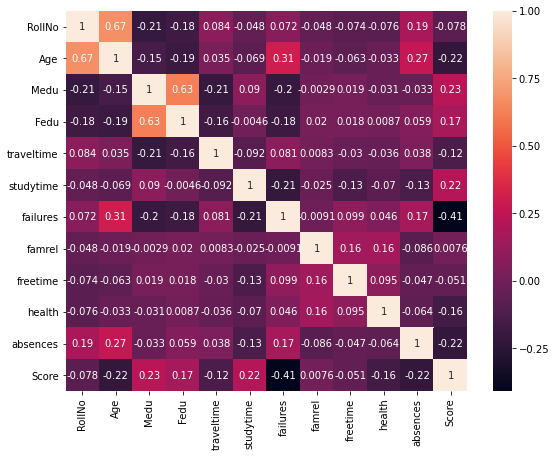

In [36]:
plt.figure(figsize = (9, 7))
sns.heatmap(corr, annot = True)

Visualising between score and failures

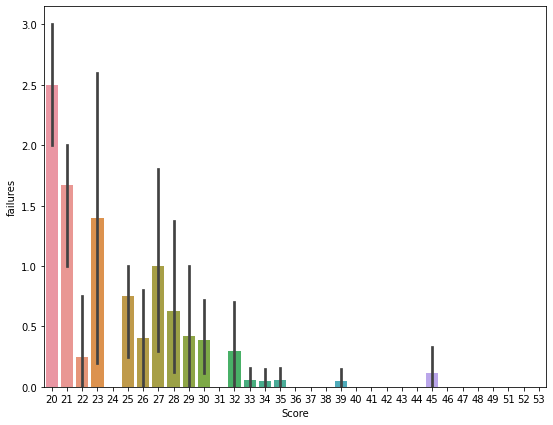

In [40]:
plt.figure(figsize = (9, 7))
sns.barplot(x = 'Score', y ='failures', data = df)

As per the above visualizations you can see If scores are low there is high chance of failure which impacts performance.

Visualizing between Internet and the score

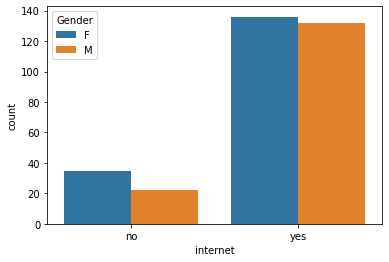

In [41]:
#univariate Analysis for finding how many people using internet
sns.countplot(x = 'internet',data = df, hue = 'Gender')

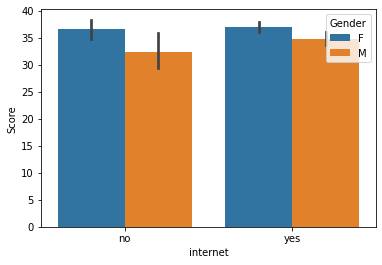

In [43]:
sns.barplot(x = 'internet', y = 'Score', data = df, hue = 'Gender')

So As per the above two visualizations there are huge number of students using internet but it slightly helped to improve the performance of students

Visualizing data between family-size and scores

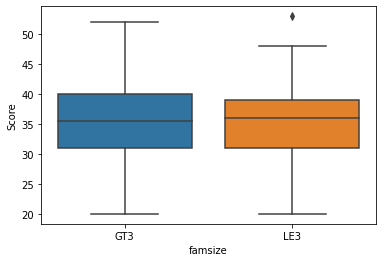

In [44]:
sns.boxplot(x='famsize',y='Score',data=df)

As we can see if the family members are Greater than 3 that students are well performing than LE3 .  

Visualizing between Scores and absences

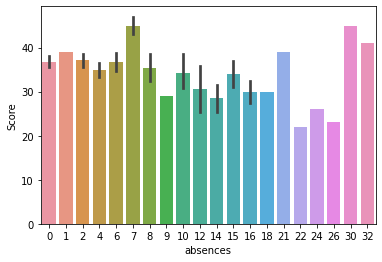

In [46]:
sns.barplot(x = 'absences', y = 'Score', data = df)

Visualization between mother education and score

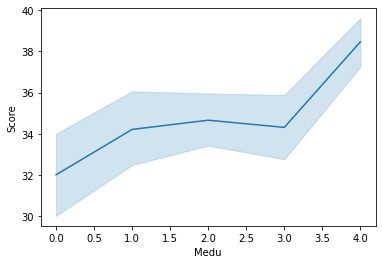

In [50]:
sns.lineplot(x = 'Medu', y = 'Score', data = df)

It is showing positive correlation between Medu and Students Score

Visualization between mother education and score

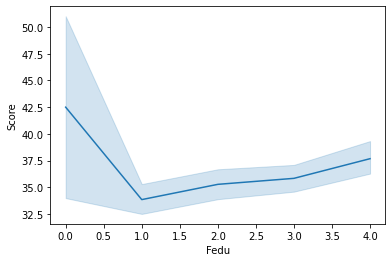

In [52]:
sns.lineplot(x = 'Fedu', y = 'Score', data = df)

Visualizing between Study Time and Score

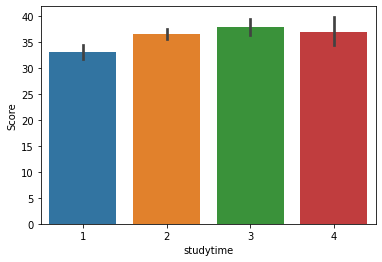

In [53]:
sns.barplot(x = 'studytime', y = 'Score', data = df)

Above Visualizations are showing the increasing trends for those study upto 10 hours but it is slightly low for those studying >= 10 hours

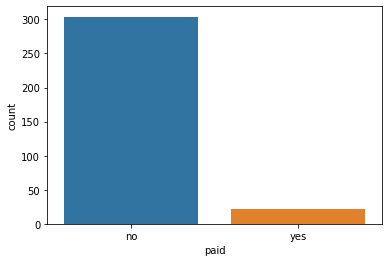

In [54]:
sns.countplot(x = 'paid', data = df)

So there are less number of students who have paid for extra classes.

Univariate analysis for activities

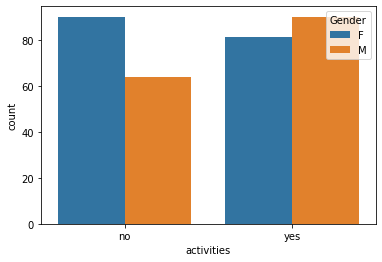

In [57]:
sns.countplot(x = 'activities', data = df, hue = 'Gender')

Female students are taking more part in extra curricular activities

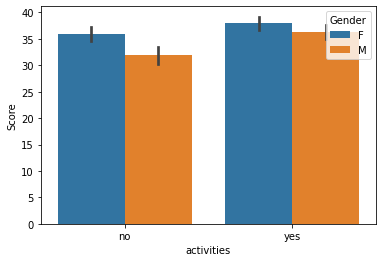

In [59]:
sns.barplot(x = 'activities', y = 'Score', data = df, hue = 'Gender')

So From the above visualizations those who are taking part in extra curricular activities are having high scores then those who are not taking part

Visualizing between free time and score

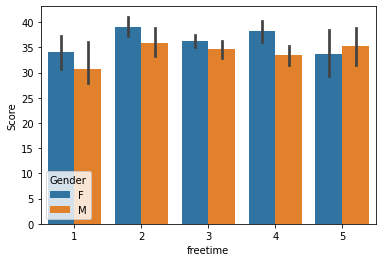

In [60]:
sns.barplot(x = 'freetime', y = 'Score', data = df, hue = 'Gender')

Above visualizations show no relations between freetime and students performance

Visualizing between Pstatus and Score

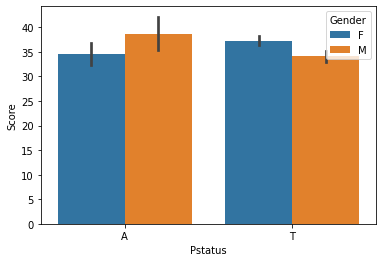

In [61]:
sns.barplot(x = 'Pstatus', y = 'Score', data = df, hue = 'Gender')

Visualizing between Health and Score

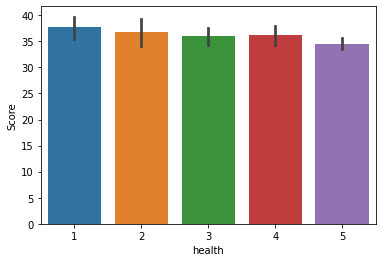

In [64]:
sns.barplot(x = 'health', y = 'Score', data = df)

Visualizing between Location and Score

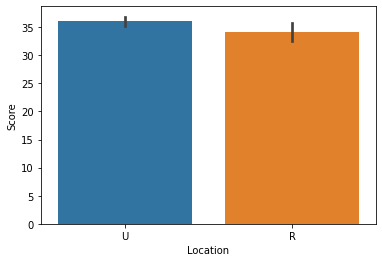

In [69]:
sns.barplot(x = 'Location', y = 'Score', data = df)